# Part 1: Getting the dataset

### Download the SFPD dataset and read the csv in Python

In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import operator
import numpy as np
%matplotlib inline

In [2]:
# Define the data path
data_path = 'SFPD_data.csv'

In [3]:
# Create a function that reads a csv to a dictionary
def parse_csv(datafile):
    with open(datafile, 'rb') as sd:
        r = csv.DictReader(sd)
        data = [line for line in r]
    return data

In [4]:
# Or load it into a Dataframe using pandas
raw_file = pd.read_csv(data_path)
df = pd.DataFrame(raw_file)
df.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


# Part 2 : Working with data

In [5]:
# But let's better work with dictionaries as we go forward
sfpd_dict = parse_csv(data_path)

In [6]:
# See how the dictionary looks like
sfpd_dict[:1]

[{'Address': '18TH ST / VALENCIA ST',
  'Category': 'NON-CRIMINAL',
  'Date': '01/19/2015',
  'DayOfWeek': 'Monday',
  'Descript': 'LOST PROPERTY',
  'IncidntNum': '150060275',
  'Location': '(37.7617007179518, -122.42158168137)',
  'PdDistrict': 'MISSION',
  'PdId': '15006027571000',
  'Resolution': 'NONE',
  'Time': '14:00',
  'X': '-122.42158168137',
  'Y': '37.7617007179518'}]

### The types of crime and their popularity over time. The first field we'll dig into is the column "Category".

* *Create a set() of all the categories of crime in the dataset. How many are there?*

In [7]:
# Instead of set() we use unique of pandas
print 'The unique categories are: %d \n\nThey are the following: \n%s' % (len(df.Category.unique()), df.Category.unique())

The unique categories are: 39 

They are the following: 
['NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'SECONDARY CODES' 'VANDALISM'
 'BURGLARY' 'LARCENY/THEFT' 'DRUG/NARCOTIC' 'WARRANTS' 'VEHICLE THEFT'
 'OTHER OFFENSES' 'WEAPON LAWS' 'ARSON' 'MISSING PERSON'
 'DRIVING UNDER THE INFLUENCE' 'SUSPICIOUS OCC' 'RECOVERED VEHICLE'
 'DRUNKENNESS' 'TRESPASS' 'FRAUD' 'DISORDERLY CONDUCT'
 'SEX OFFENSES, FORCIBLE' 'FORGERY/COUNTERFEITING' 'KIDNAPPING'
 'EMBEZZLEMENT' 'STOLEN PROPERTY' 'LIQUOR LAWS' 'FAMILY OFFENSES'
 'LOITERING' 'BAD CHECKS' 'TREA' 'GAMBLING' 'RUNAWAY' 'BRIBERY'
 'PROSTITUTION' 'PORNOGRAPHY/OBSCENE MAT' 'SEX OFFENSES, NON FORCIBLE'
 'SUICIDE' 'EXTORTION']


* *Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?*

In [8]:
# Can be done with pandas with reset_index to turn Series into a dataframe
crime_occurences = df['Category'].groupby(df['Category']).count().sort_values(ascending=1).reset_index(name='count')
crime_occurences

,Category,count
0,TREA,13
1,PORNOGRAPHY/OBSCENE MAT,50
2,GAMBLING,326
3,"SEX OFFENSES, NON FORCIBLE",376
4,EXTORTION,669
5,BRIBERY,732
6,BAD CHECKS,891
7,FAMILY OFFENSES,1128
8,SUICIDE,1197
9,LOITERING,2382


* *Create a histogram over crime occurrences.*

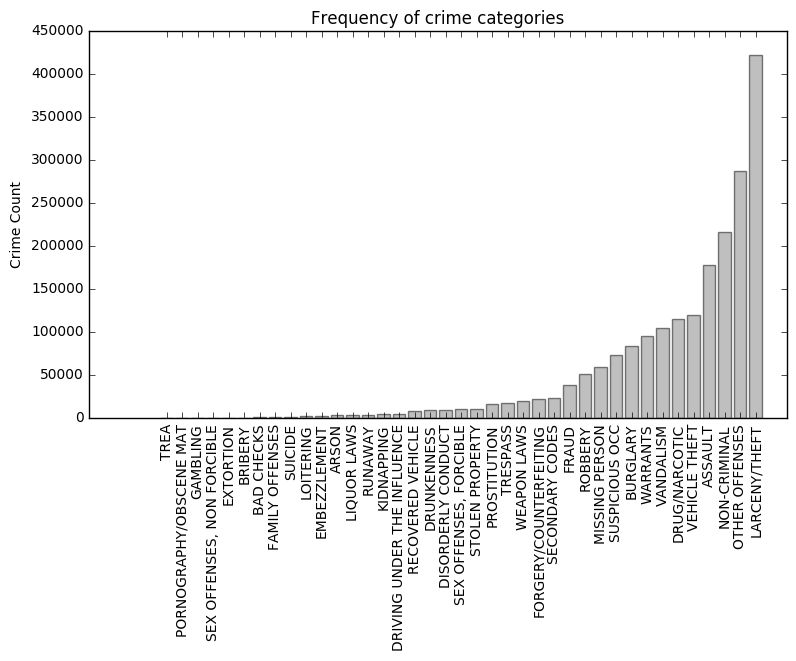

In [23]:
# Assign x and y values
x = crime_occurences['Category']
y = crime_occurences['count']

# Give indeces to crimes
x_pos = np.arange(len(x))

# Assign the size of the plot before declaring the plot
plt.figure(figsize= (9,5))

# Give the x and y values to the barplot
plt.bar(x_pos, y,align='center', color='grey', alpha=.5)

# Match the indeces with the correct courses and assign them to the x-axis
plt.xticks(x_pos, x, rotation='vertical')

# Give labels and titles
plt.ylabel("Crime Count")
plt.title("Frequency of crime categories")

# Show the barplot
plt.show()

* *Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2016 (the full years in the database). For that one, I used the date column in the CSV file and used year = int( date.split("/")[-1] ) to extract the year of each crime. What's the average number of crimes per year?*

In [10]:
# Turn Date into a datetime type instead of string
#df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Create a function that gets the date
def getYear(s):
    return int(s.split('/')[-1])

In [12]:
# Now create a new column named year and store the values of the above function
df['Year']= df['Date'].apply(lambda x: getYear(x))

In [20]:
# List the number of crimes per year
crime_occurences_time = df.groupby('Year')['Year'].count().reset_index(name='count').sort_values(by='Year', ascending=1)
crime_occurences_time

,Year,count
0,2003,149176
1,2004,148148
2,2005,142186
3,2006,137853
4,2007,137639
5,2008,141311
6,2009,139860
7,2010,133523
8,2011,132697
9,2012,140854


* *Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2016.*

In [24]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [54]:
# Keep only the Categories of the list in a seperate dataframe
focus_df = df.filter(items=['Category', 'Year']) 
focus_df = focus_df[focus_df['Category'].isin(focuscrimes)]
focus_df.head()

,Category,Year
1,ROBBERY,2015
2,ASSAULT,2015
4,VANDALISM,2015
7,VANDALISM,2015
8,BURGLARY,2015


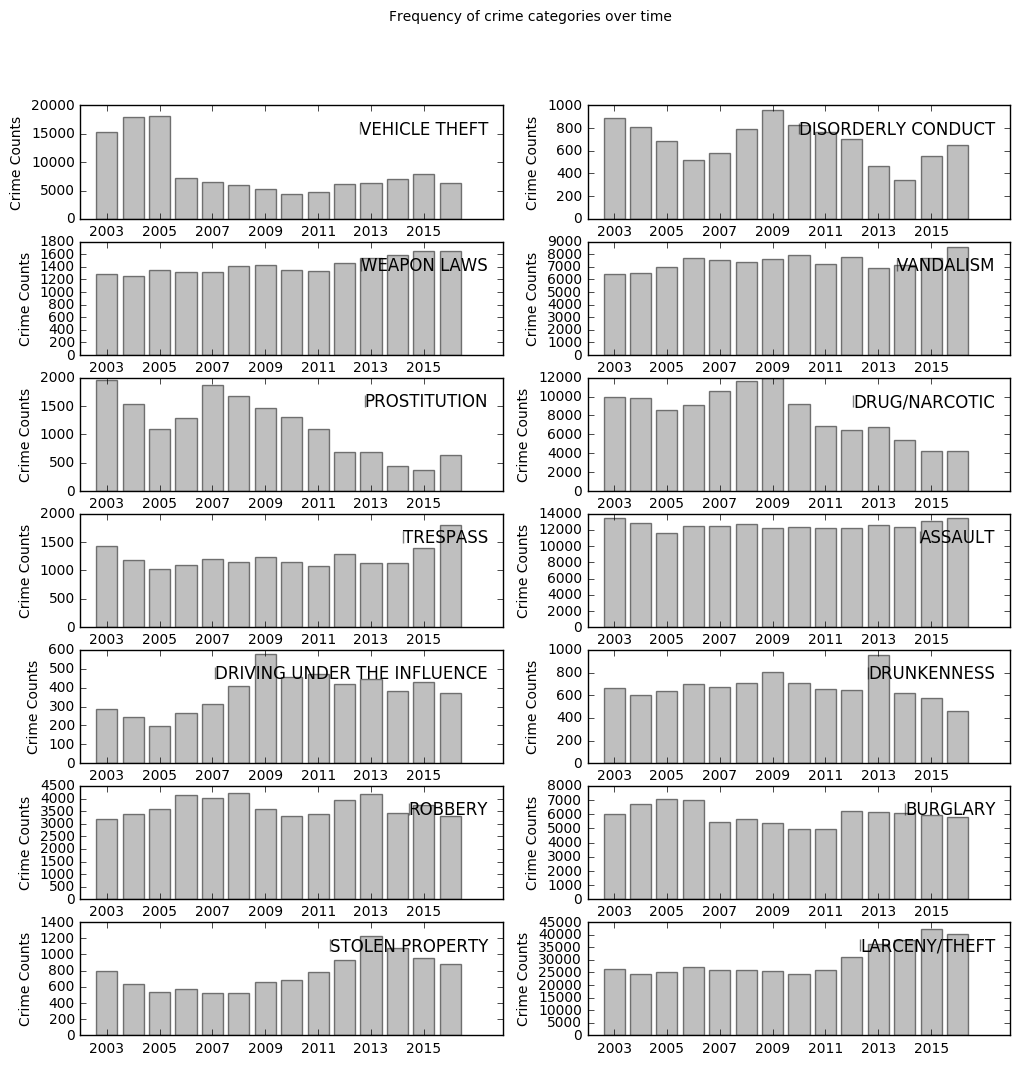

In [89]:
plt.figure(figsize = (12,12))
plt.suptitle('Frequency of crime categories over the years')
for index,crime in enumerate(focuscrimes):
    # Create a matrix of subplots with 7 rows and two columns
    plt.subplot(7,2,index+1)
     
    # Create a sub-df for each category
    temp_df = focus_df[focus_df['Category']==crime]
    
    # Drop column category from the new df to keep only year
    temp_df = temp_df.drop('Category', axis=1) # axis=1 means column
    
    # Drop 2017 as it could be misleading as only few values for the first two months exist
    temp_df = temp_df[temp_df.Year != 2017]
    
    # Count frequency of crime occurence
    occurence = temp_df.groupby('Year')['Year'].count().reset_index(name='count').sort_values(by='Year', ascending=1)
    
    # Assign x and y values
    x = occurence['Year']
    y = occurence['count']

    plt.bar(x,y,align='center',alpha=.5, color='grey',label=crime)
    plt.xticks(np.arange(2003,2017,2))
    plt.ylabel("Crime Counts")
    plt.legend(loc='upper right',frameon=False,handlelength=0, handletextpad=0)
    #plt.title("Linear regression dataset %d" %(i+1))
    
# Show the barplot
plt.show()

* *Comment on at least three interesting trends in your plot. Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story here.*

### The types of crime and their popularity across the 24 hours of the day

* *First, plot a simple histogram of the number of crimes per hour in the dataset. This piece of information is in the Time column of the CSV file, and I simply used hr = int( time.split(":")[0] ) to get this info out. There's a little strange peak at 12:00 - what do you think is going on there? (No need for a serious exploration, just some thoughts on what might be going on).*

In [91]:
# Create a function that gets the time
def getHour(s):
    return int(s.split(':')[0])

In [92]:
# Now create a new column named hour and store the values of the above function
df['Hour']= df['Time'].apply(lambda x: getHour(x))

In [99]:
# List the number of crimes per year
crime_occurences_hour = df.groupby('Hour')['Hour'].count().reset_index(name='count').sort_values(by='Hour', ascending=1)

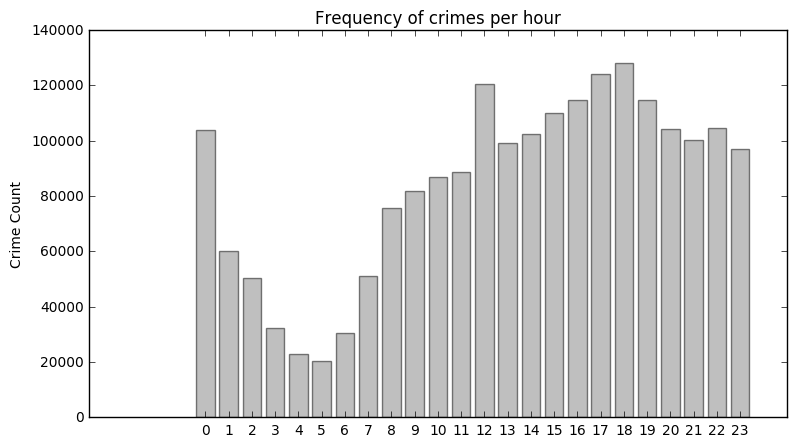

In [100]:
# Assign x and y values
x = crime_occurences_hour['Hour']
y = crime_occurences_hour['count']

# Assign the size of the plot before declaring the plot
plt.figure(figsize= (9,5))

# Give the x and y values to the barplot
plt.bar(x, y, align = 'center', color='grey', alpha=.5)

# Give labels and titles
plt.ylabel("Crime Count")
plt.title("Frequency of crimes per hour")
plt.xticks(range(0,24,1))

# Show the barplot
plt.show()

* *Next create a plot of the count of each crime category across the 24 hours of the day. Again, comment on at least three trends in the data. *

In [101]:
# Keep only the Categories of the list in a seperate dataframe
focus_df2 = df.filter(items=['Category', 'Hour']) 
focus_df2 = focus_df2[focus_df2['Category'].isin(focuscrimes)]
focus_df2.head()

,Category,Hour
1,ROBBERY,15
2,ASSAULT,15
4,VANDALISM,19
7,VANDALISM,21
8,BURGLARY,16


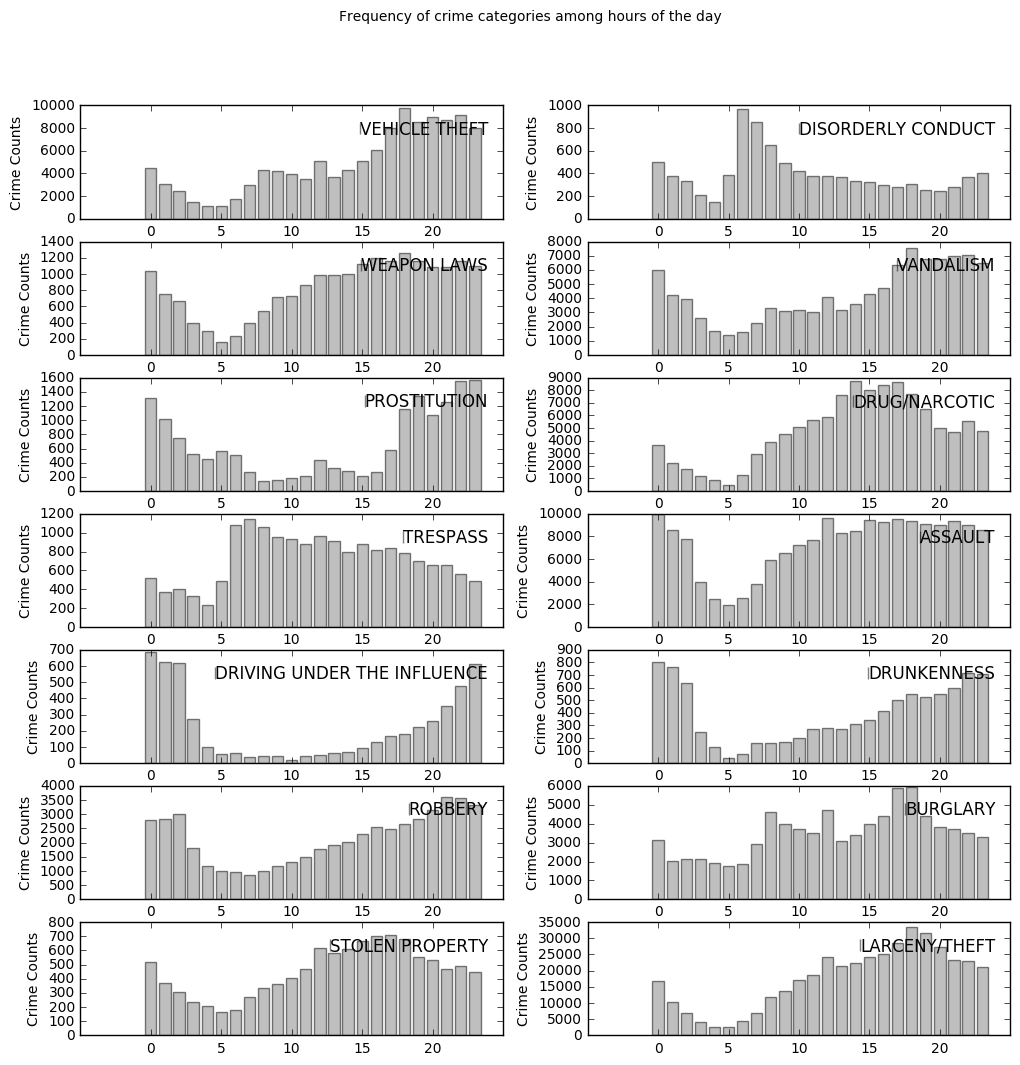

In [103]:
plt.figure(figsize = (12,12))
plt.suptitle('Frequency of crime categories among hours of the day')
for index,crime in enumerate(focuscrimes):
    # Create a matrix of subplots with 7 rows and two columns
    plt.subplot(7,2,index+1)
     
    # Create a sub-df for each category
    temp_df2 = focus_df2[focus_df2['Category']==crime]
    
    # Drop column category from the new df to keep only year
    temp_df2 = temp_df2.drop('Category', axis=1) # axis=1 means column
    
    # Drop 2017 as it could be misleading as only few values for the first two months exist
    temp_df2 = temp_df2[temp_df2.Hour != 2017]
    
    # Count frequency of crime occurence
    occurence = temp_df2.groupby('Hour')['Hour'].count().reset_index(name='count').sort_values(by='Hour', ascending=1)
    
    # Assign x and y values
    x = occurence['Hour']
    y = occurence['count']

    plt.bar(x,y,align='center',alpha=.5, color='grey',label=crime)
    plt.xticks(np.arange(0,24,5))
    plt.ylabel("Crime Counts")
    plt.legend(loc='upper right',frameon=False,handlelength=0, handletextpad=0)
    #plt.title("Linear regression dataset %d" %(i+1))
    
# Show the barplot
plt.show()

### The types of crime and how they take place across San Francisco's police districts.

* *So now we'll be combining information about PdDistrict and Category to explore differences between SF's >neighborhoods. First, simply list the names of SF's 10 police districts.*

In [113]:
# Create a list of unique values of districts excluding nulls
districts = [i for i in df.PdDistrict.unique() if pd.notnull(i)]
print 'The %d police districts of SanFrancisco are: \n%s' % (len(districts),districts)

The 10 police districts of SanFrancisco are: 
['MISSION', 'TENDERLOIN', 'NORTHERN', 'RICHMOND', 'BAYVIEW', 'CENTRAL', 'PARK', 'TARAVAL', 'SOUTHERN', 'INGLESIDE']


* *Which has the most crimes? Which has the most focus crimes?*

In [125]:
# Keep only the Category and the District column
catdist_df = df.filter(items=['Category', 'PdDistrict']) 
catdist_df = catdist_df[catdist_df['PdDistrict'].isin(districts)]

# List the number of crimes per District
crime_occurences_district = catdist_df.groupby('PdDistrict')['PdDistrict'].count().reset_index(name='count').sort_values(by='count', ascending=0)

# Print the district with the most crimes
print 'The districts with the most crimes are:\n'
crime_occurences_district = crime_occurences_district.reset_index().drop('index', axis=1)
crime_occurences_district[:5]

The districts with the most crimes are:



,PdDistrict,count
0,SOUTHERN,364516
1,MISSION,273386
2,NORTHERN,246991
3,BAYVIEW,203841
4,CENTRAL,202342


In [126]:
# Filter out only the focus crimes
catdistfocus_df = catdist_df[catdist_df['Category'].isin(focuscrimes)]

# List the number of crimes per District
crime_occurences_district_focus = catdistfocus_df.groupby('PdDistrict')['PdDistrict'].count().reset_index(name='count').sort_values(by='count', ascending=0)

# Print the district with the most focus crimes
print 'The districts with the most focus crimes are:\n'
crime_occurences_district_focus = crime_occurences_district_focus.reset_index().drop('index', axis=1)
crime_occurences_district_focus[:5]

The districts with the most focus crimes are:



,PdDistrict,count
0,SOUTHERN,208888
1,NORTHERN,157664
2,MISSION,151657
3,CENTRAL,125981
4,BAYVIEW,107768


* *Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes >that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:*

> First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. > That's simply a normalized version of this plot. Let's call it P(crime)

In [129]:
# Create one more column with the relative probability of seeing each type of crime
crime_occurences_district['P(crime)'] = crime_occurences_district['count']/crime_occurences_district['count'].sum()
crime_occurences_district[:5]

,PdDistrict,count,P(crime)
0,SOUTHERN,364516,0.180109
1,MISSION,273386,0.135081
2,NORTHERN,246991,0.122039
3,BAYVIEW,203841,0.100719
4,CENTRAL,202342,0.099978


* *Next, we calculate that same probability distribution but for each PD district, let's call that P(crime|district).*